<h1>Instagram Image downloader</h1>

This project allows you to download all the images of a user on instagram in the highest possible resolution, so whether you are looking for an easy way to enlarge your database for an AI project, download all the photos from a blog about interior desing, or you are just a huge stalker, this project is for you.

In [ ]:
# Run this cell to install the necessary dependencies for this project
import sys
!{sys.executable} -m pip install selenium
!{sys.executable} -m pip install requests

First we import the necessary dependencies for this project

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
import requests
import os

To run an instance of the browser, selenium uses some drivers, which we initialize in the next line, these drivers are in the project path and are for version 99 of chrome

<b>webdriver.Chrome('./chromedriver')</b>

but if this gives you an error you can check the version of chrome you are using in the following link: https://www.whatismybrowser.com/detect/what-version-of-chrome-do-i-have

And you can download the correct drivers here: https://chromedriver.chromium.org/downloads

Then you just need to replace the exe.

Since instagram uses thumbnails on its home screen we cannot directly download the images from there or we would obtain very small images and therefore of low quality, so the steps we use are the following:

- We open Instagram and authenticate ourselves (we initialize the class by passing our username and password as arguments) <b><i>(InstaBot)</i></b>

- We retrieve from the html all the hyperlinks to which each of the thumbnails would send us <b><i>(getAllPagesURLs)</i></b>

- We visit each of the links we get and pull the link to the highest resolution image for each image on the page (excluding images we don't care about (icons, logos, etc.))<b><i>(getAllImgURLs)</i></b>

- We save each of the images in a folder with the name of the user<b><i>(saveIMGs)</i></b>

We declare the variables and classes that we will use:

In [ ]:
pagesURL = set()
imagesURL = []
        
class InstaBot:
    def __init__(self, username, pw):
        self.driver = webdriver.Chrome('./chromedriver')
        self.username = username
        self.driver.get("https://instagram.com")
        sleep(5)
        self.driver.find_element_by_xpath("//input[@name=\"username\"]")\
            .send_keys(username)
        self.driver.find_element_by_xpath("//input[@name=\"password\"]")\
            .send_keys(pw)
        self.driver.find_element_by_xpath('//button[@type="submit"]')\
            .click()
        sleep(4)
        self.driver.find_element_by_xpath("//button[contains(text(), 'Not Now')]")\
            .click()
        sleep(2)

    def getAllPagesURLs(self, tag):
        self.driver.get("https://www.instagram.com/" + tag + "/")
        sleep(4)
        last_height = self.driver.execute_script("return document.body.scrollHeight")
        while True:
            self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            sleep(4)
            new_height = self.driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
            elems = self.driver.find_elements_by_xpath("//a[@href]")
            for elem in elems:
                URL = elem.get_attribute("href")
                if URL.startswith('https://www.instagram.com/p/'):
                    pagesURL.add(URL)
                
    def getAllImgURLs(self):
        for elem in pagesURL:
            self.driver.get(elem)
            pageSource = self.driver.page_source
            elems = self.driver.find_elements_by_xpath("//img[@srcset]")
            for subElem in elems:
                imgURL = subElem.get_attribute("srcset").split(" ", 1)[0]
                if imgURL.startswith('https://instagram.'):
                    imagesURL.append(imgURL)
    
    def saveIMGs(self, elem, name, folder):
        if not os.path.exists(folder):
            os.makedirs(folder)
        img_data = requests.get(elem).content
        with open(folder + "/" + name + '.jpg', 'wb') as handler:
            handler.write(img_data)
            
    
            
    def close(self):
        self.driver.quit()

We declare the tag, which is the user we want to get the photos from (without the @) or the argument in the URL:

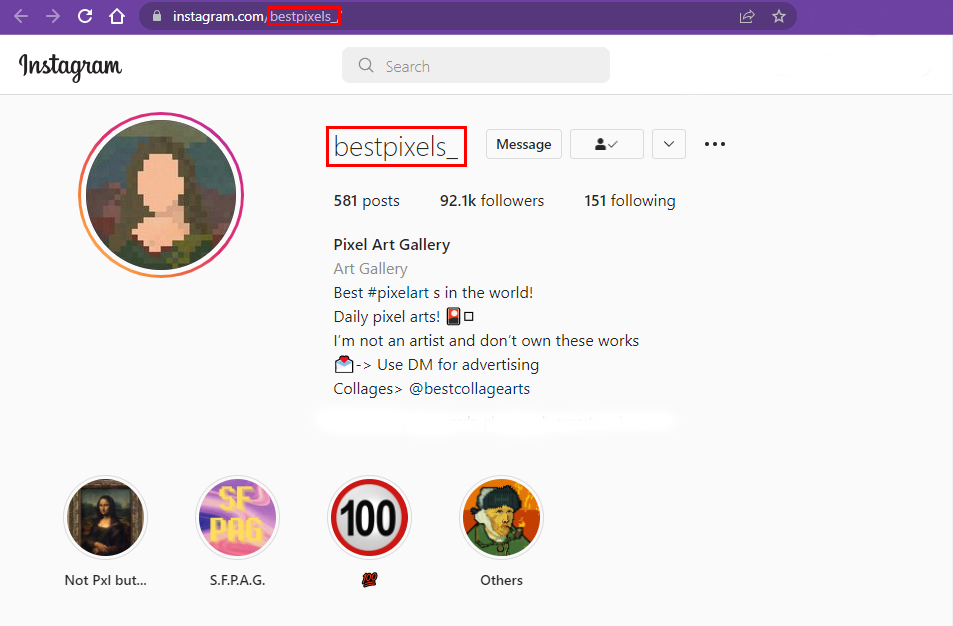

In [ ]:
TAG = 'bestpixels_'

we initialize the class by passing our username and password as arguments, then run all the steps above and close the connection

In [ ]:
my_bot = InstaBot('some_user', 'some_password')
my_bot.getAllPagesURLs(TAG)
my_bot.getAllImgURLs()
for index, elem in enumerate(imagesURL):
    my_bot.saveIMGs(elem, str(index), TAG)
my_bot.close()

<i>Note: the first time it may not work for you, instagram may require 2 factor authentication, if this happens to you, authenticate and close the browser, now run the script again and it should work</i>

<img src="Assets/Instagram-Image-Downloader.gif" />

<h2> Full code</h2>

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
import requests
import os

pagesURL = set()
imagesURL = []
        
class InstaBot:
    def __init__(self, username, pw):
        self.driver = webdriver.Chrome('./chromedriver')
        self.username = username
        self.driver.get("https://instagram.com")
        sleep(5)
        self.driver.find_element_by_xpath("//input[@name=\"username\"]")\
            .send_keys(username)
        self.driver.find_element_by_xpath("//input[@name=\"password\"]")\
            .send_keys(pw)
        self.driver.find_element_by_xpath('//button[@type="submit"]')\
            .click()
        sleep(4)
        self.driver.find_element_by_xpath("//button[contains(text(), 'Not Now')]")\
            .click()
        sleep(2)

    def getAllPagesURLs(self, tag):
        self.driver.get("https://www.instagram.com/" + tag + "/")
        sleep(4)
        last_height = self.driver.execute_script("return document.body.scrollHeight")
        while True:
            self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            sleep(4)
            new_height = self.driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
            elems = self.driver.find_elements_by_xpath("//a[@href]")
            for elem in elems:
                URL = elem.get_attribute("href")
                if URL.startswith('https://www.instagram.com/p/'):
                    pagesURL.add(URL)
                
    def getAllImgURLs(self):
        for elem in pagesURL:
            self.driver.get(elem)
            pageSource = self.driver.page_source
            elems = self.driver.find_elements_by_xpath("//img[@srcset]")
            for subElem in elems:
                imgURL = subElem.get_attribute("srcset").split(" ", 1)[0]
                if imgURL.startswith('https://instagram.'):
                    imagesURL.append(imgURL)
    
    def saveIMGs(self, elem, name, folder):
        if not os.path.exists(folder):
            os.makedirs(folder)
        img_data = requests.get(elem).content
        with open(folder + "/" + name + '.jpg', 'wb') as handler:
            handler.write(img_data)
            
    
            
    def close(self):
        self.driver.quit()
        
TAG = 'bestpixels_'
my_bot = InstaBot('some_user', 'some_password')
my_bot.getAllPagesURLs(TAG)
my_bot.getAllImgURLs()
for index, elem in enumerate(imagesURL):
    my_bot.saveIMGs(elem, str(index), TAG)
my_bot.close()